In [57]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import regression_funs as rfu 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## constants and functions

In [58]:

PATH_TO_FILE = '../data_in/flexpart-mosaic-data_alias/AIRTRACER_100m.nc'

PATH_TO_SO2 = '../data_in/flexpart-mosaic-data_alias/MSAQSO2L4_2005-2018_v01-04_20190314.h5'

PATH_TO_ST = '../data_in/ciapitof_masked_filtered.csv'

PATH_200_CLUS = '../data_out/cluster200.nc'

LA = 'lat'
LO = 'lon'
TI = 'time'
AG = 'age'
AT = 'AIRTRACER'
L = 'lab'
CM = 'tab20'

SA = 'sa'
MSA = 'msa'
IA = 'ia'

LSA = 'log10(sa)'
LMSA = 'log10(msa)'
LIA = 'log10(ia)'

COLS = [SA, MSA, IA]
LCOLS = [LSA, LMSA, LIA]

DATA_OUT = '../data_out'

COL = plt.get_cmap('Dark2')

DC = {
    SA  : COL(0),
    MSA : COL(1),
    IA  : COL(2),
    LSA : COL(0),
    LMSA: COL(1),
    LIA : COL(2),
}

In [3]:
df = pd.read_csv(PATH_TO_ST, index_col=0, parse_dates=True)

for l, c in zip(COLS, LCOLS):
    df[c] = np.log10(df[l])

# distributions 


lets find what kind of dist. do we have. They seem to be log dists. 

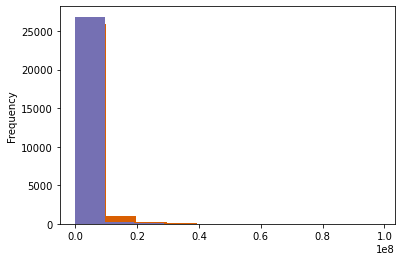

In [59]:
for c in COLS:
    df[c].plot.hist(color=DC[c])

Text(0.5, 0, 'log10')

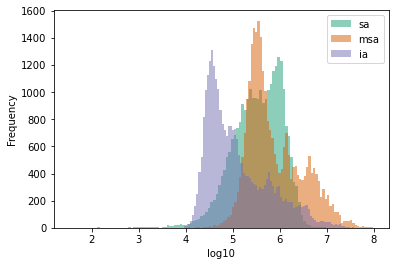

In [60]:
for c in COLS:
    np.log10(df[c]).plot.hist(alpha=.5, bins=100, label=c, color=DC[c])
ax = plt.gca()
ax.legend()
ax.set_xlabel('log10')

# timeseries of the trace gases

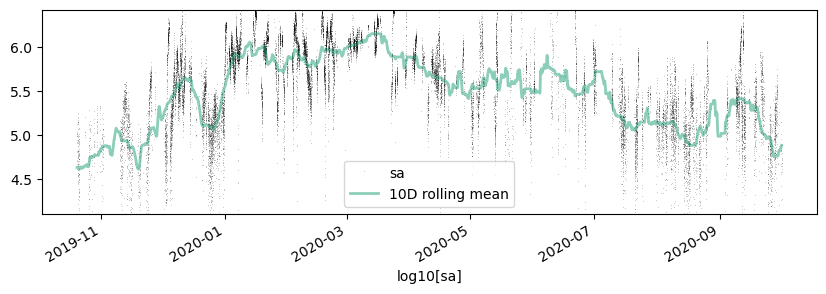

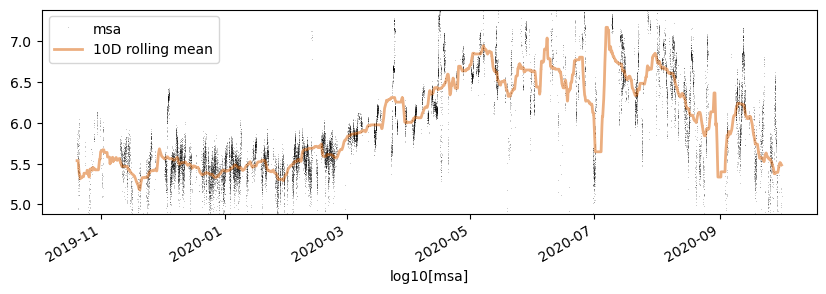

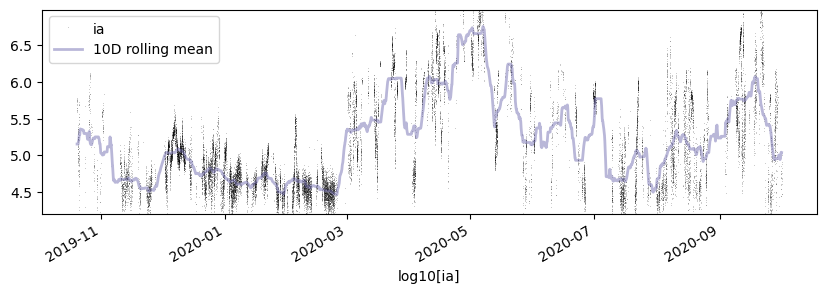

In [61]:
for c in COLS:
    rfu.plot_ts(c,df,DC)

# open and merge flex 200 clusters 

In [70]:
ds = xr.open_dataset(PATH_200_CLUS)

In [63]:
dsf = ds.groupby(L).sum().to_dataframe()[AT].unstack(L)

q0, q1 = np.quantile(dsf.values.flatten(), [.01, .99])



# f, axs = plt.subplots(10, 20, sharex=True, sharey=True, figsize=(20, 20))
# axf = axs.flatten()

# for i, ax in zip(dsf.columns, axf):
#     ax.hist(np.log10(dsf[i] + q0), bins=np.linspace(np.log10(q0), np.log10(q1 + q0), 20))
#     ax.set_xlabel('')
#     ax.set_ylabel('')

In [64]:
dsfn = dsf / dsf.mean()

In [65]:
q0, q1 = dsfn.stack().quantile([.01, .99])

In [66]:
# f, axs = plt.subplots(10, 20, sharex=True, sharey=True, figsize=(20, 20))
# axf = axs.flatten()

# for i, ax in zip(dsfn.columns, axf):
#     ax.hist(dsfn[i], bins=np.linspace(q0, q1, 20))
#     ax.set_xlabel('')
#     ax.set_ylabel('')

In [67]:
df1 = df

In [68]:
df2 = df1.resample('3H').median()

In [69]:
dm = pd.merge(df2, dsf, left_index=True, right_index=True, how='inner', validate="1:1")

# Invers modeling elastic NET 

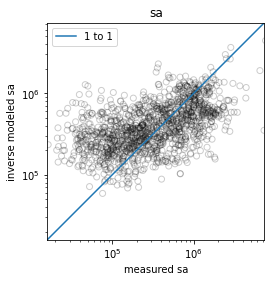

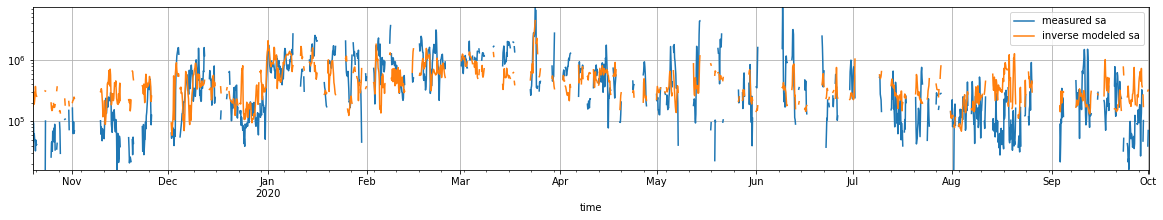

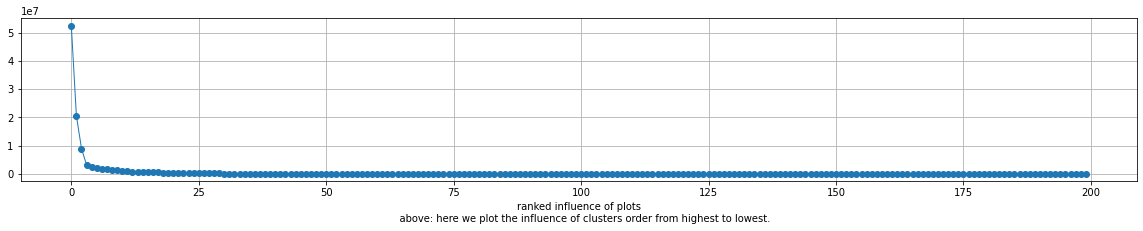

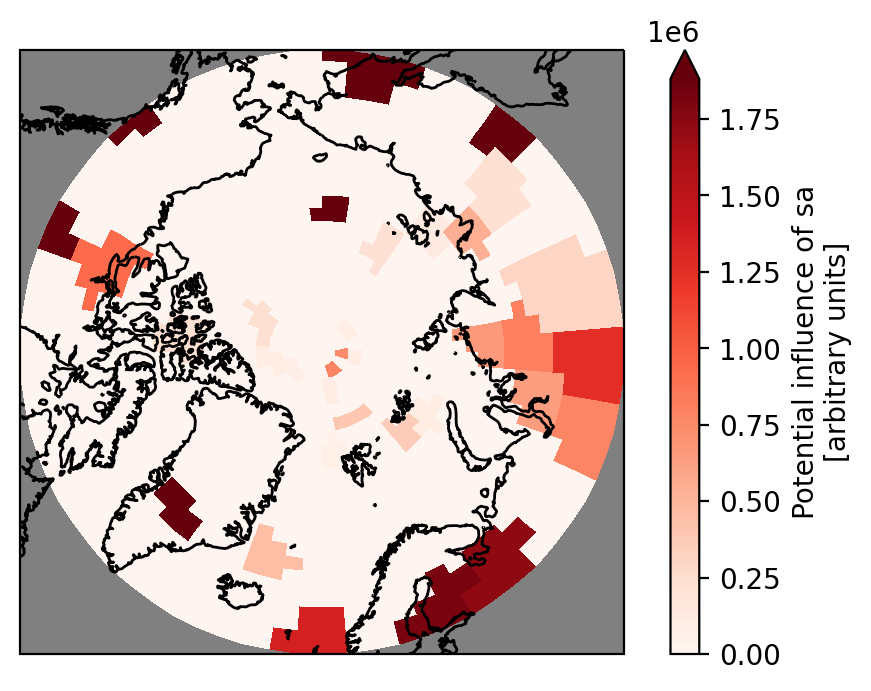

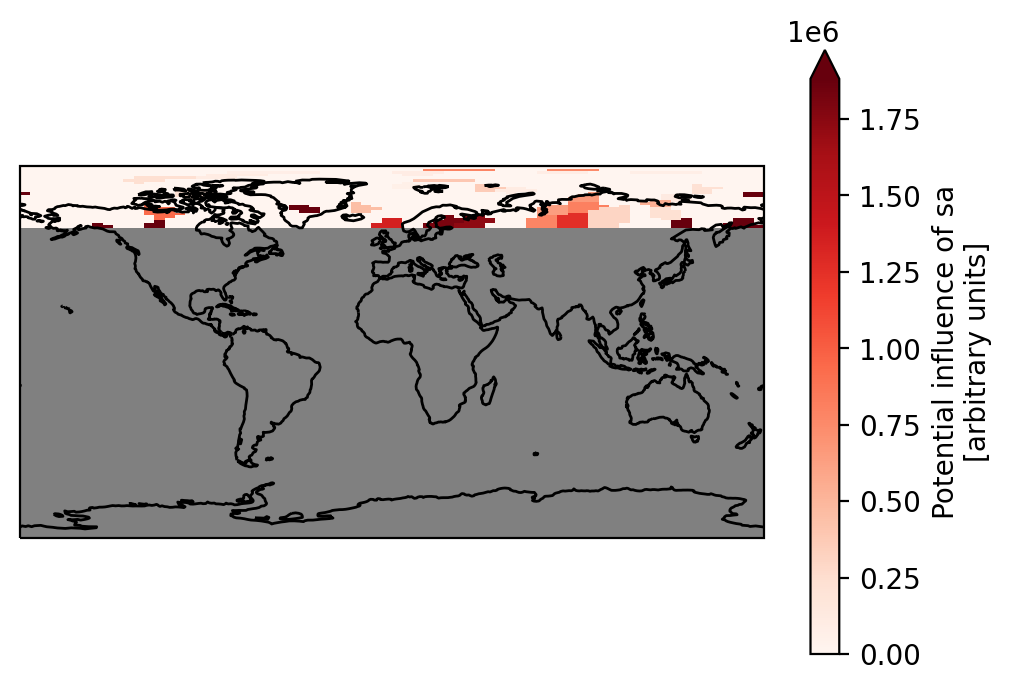

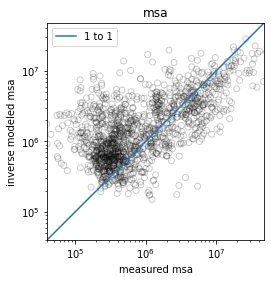

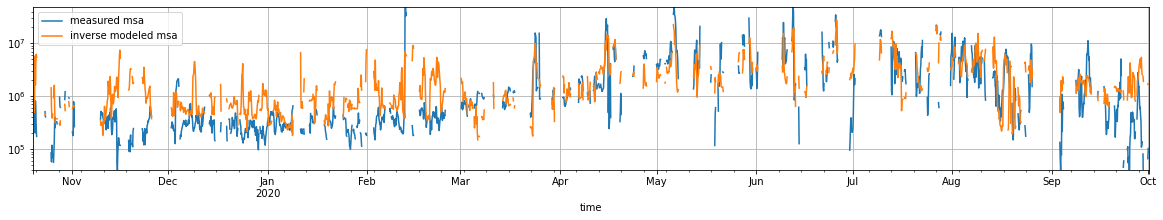

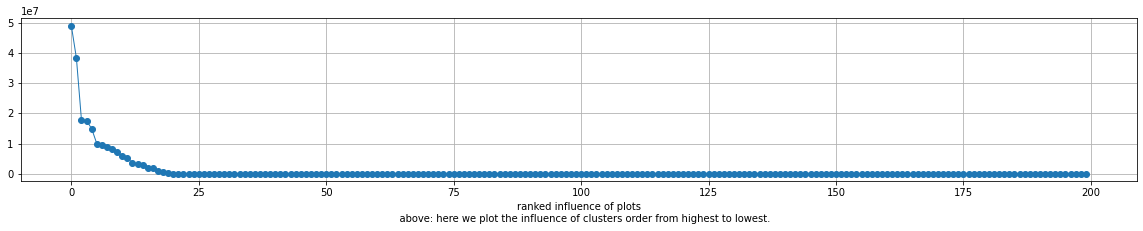

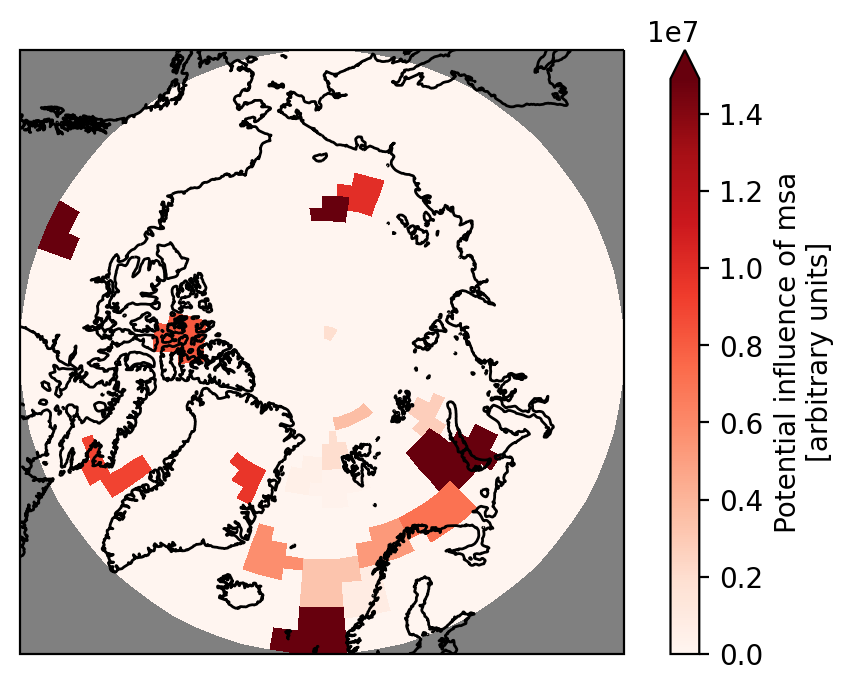

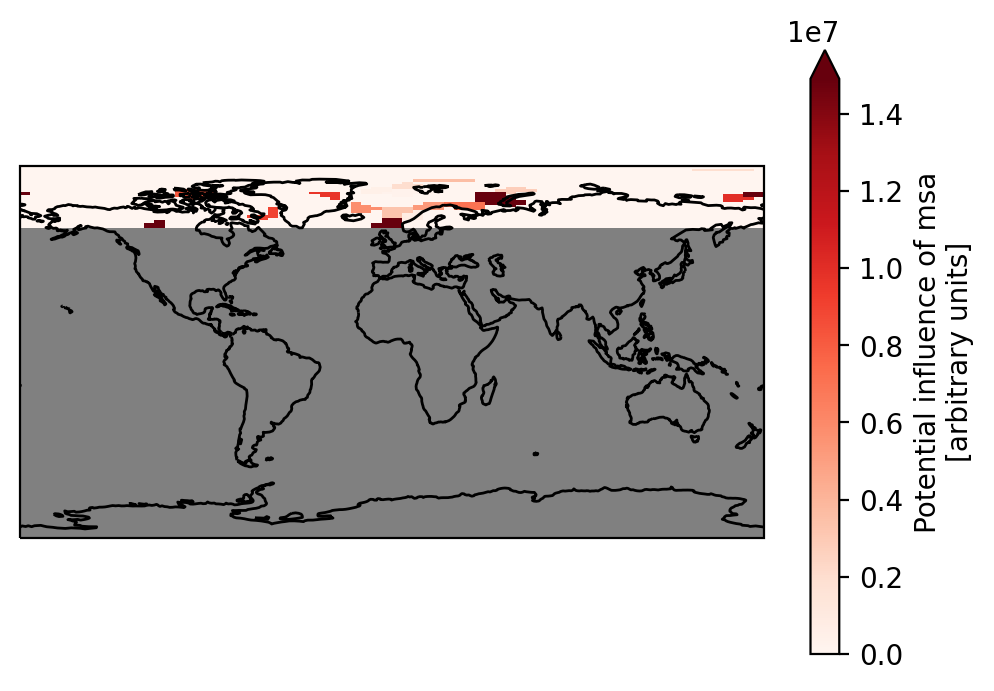

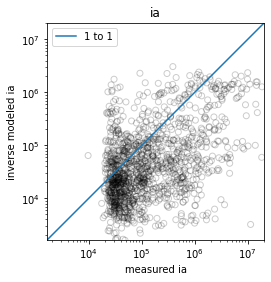

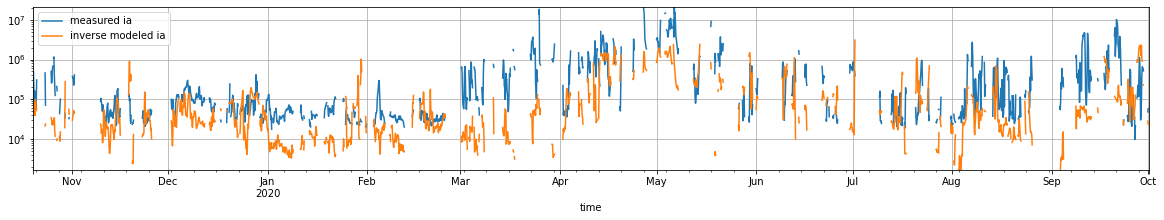

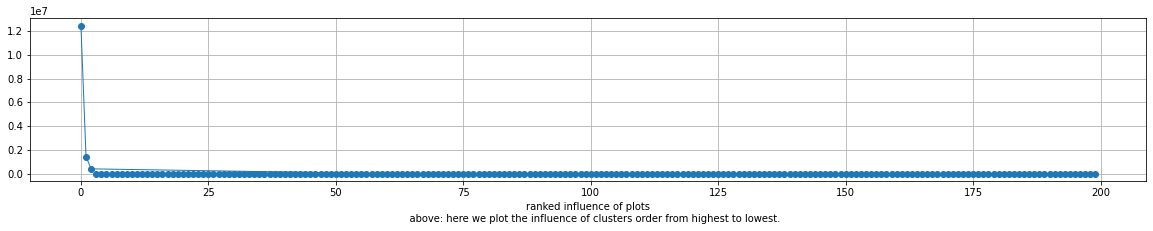

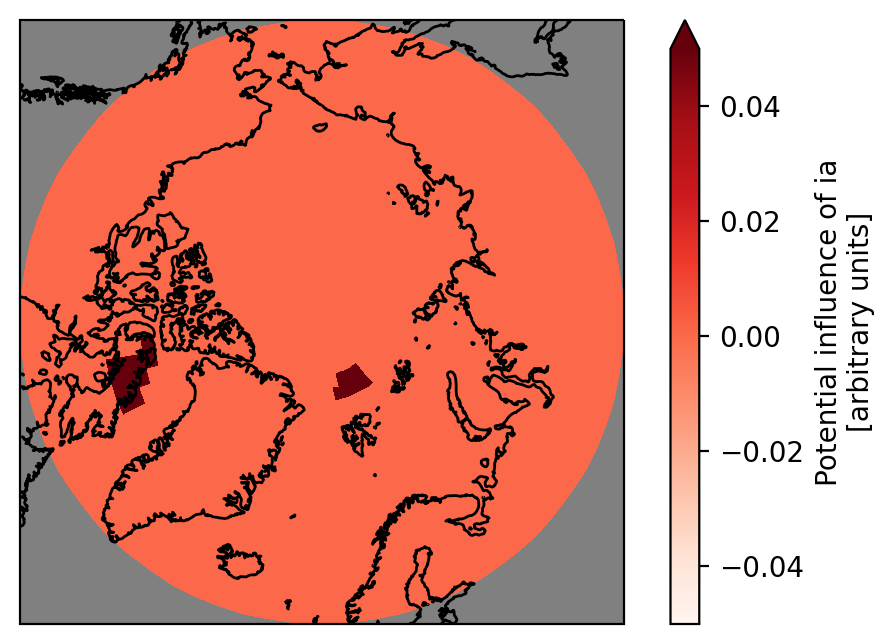

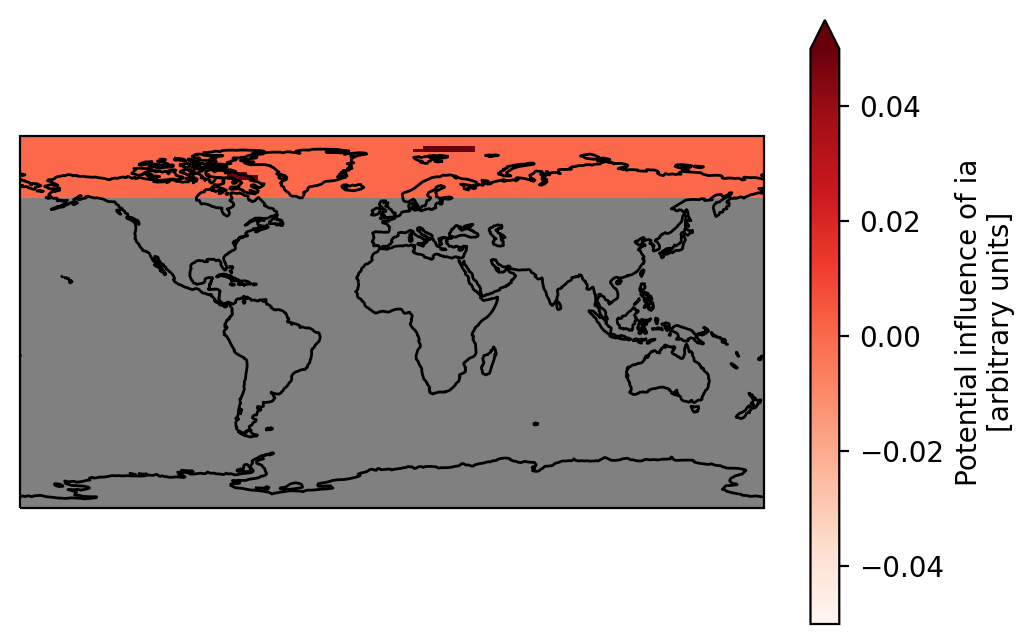

In [75]:
for PAR in [SA,MSA,IA]:
    pred, cdf, y, yn, dp = rfu.elastic_net_reg(dsf, dm, PAR)
    MEA = f'measured {PAR}'
    MOD = f'inverse modeled {PAR}'
    rfu.scatter_plot(y, yn, pred, MEA, MOD, PAR)
    rfu.mea_vs_mod_plot(y, yn, dp, pred, MEA, MOD)
    rfu.rank_cluster_inf(cdf)
    dd2 = rfu.get_plot_inf(cdf, L, ds, PAR)
    rfu.plot_map(dd2)
    rfu.plot_map_rect(dd2)

#compare sulfuric acid with the literature

https://acp.copernicus.org/articles/18/16571/2018/acp-18-16571-2018.pdf

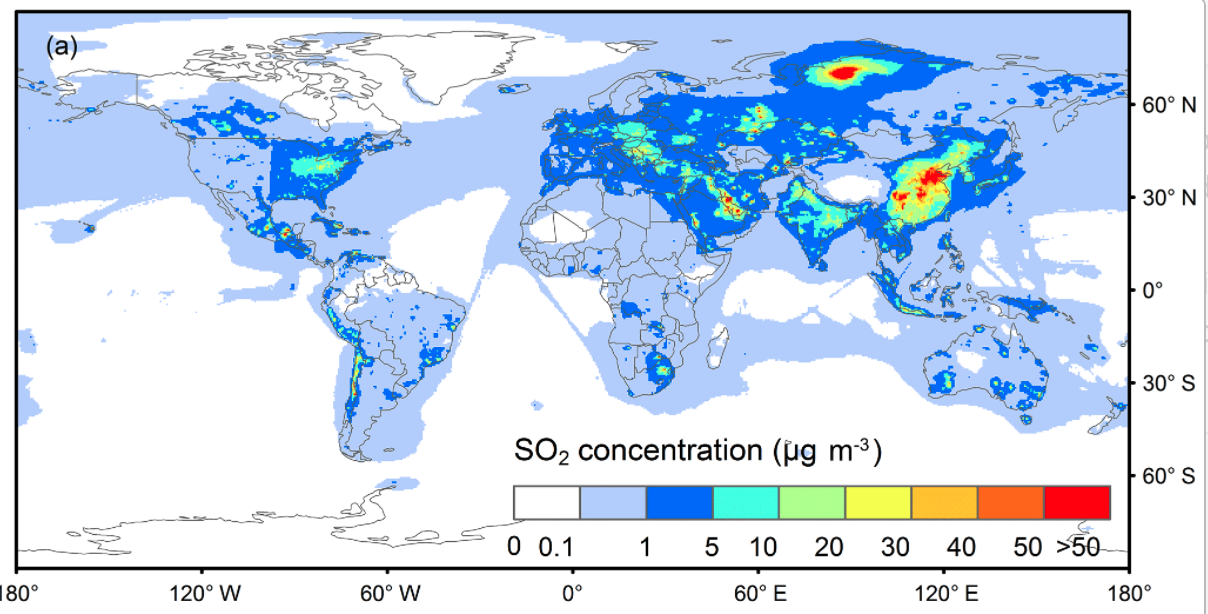

from here: https://acp.copernicus.org/articles/20/5591/2020/
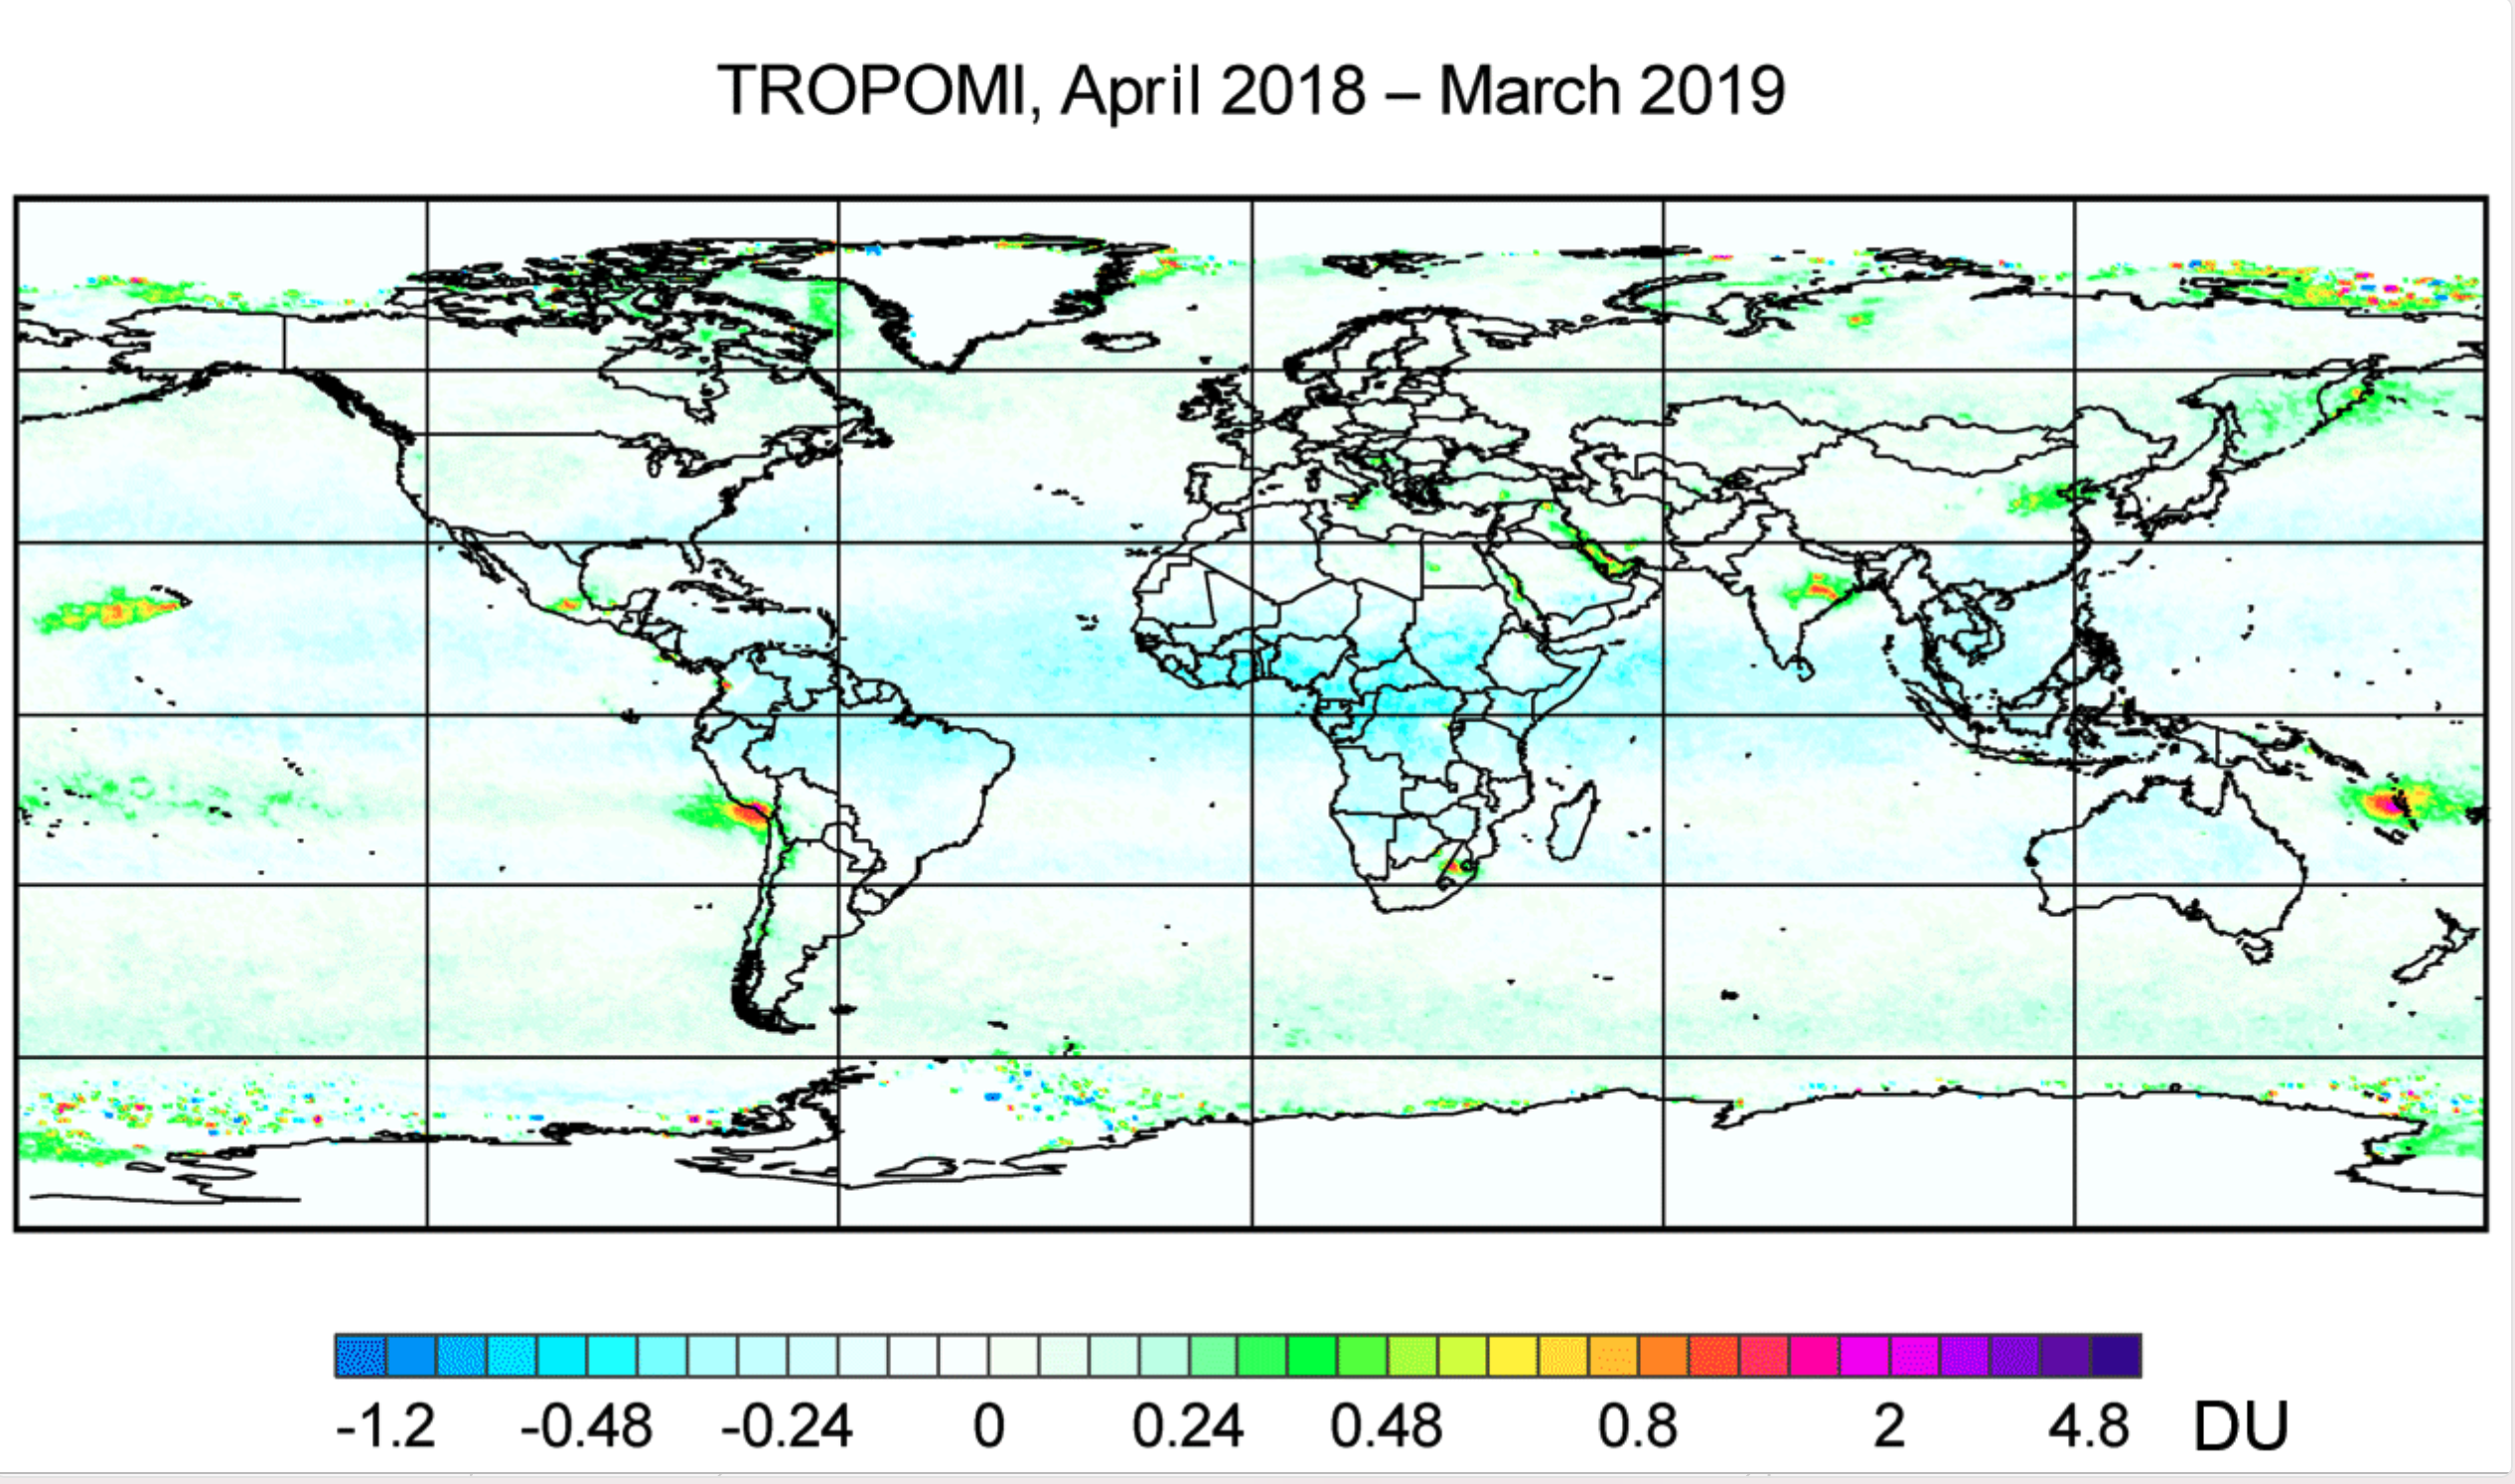

In [2]:
#convert to mrakdown 
!jupyter-nbconvert --to markdown z020_inverse_modeling.ipynb

[NbConvertApp] Converting notebook z020_inverse_modeling.ipynb to markdown
[NbConvertApp] Support files will be in z020_inverse_modeling_files/
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] Making directory z020_inverse_modeling_files
[NbConvertApp] M